In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import scipy.stats as st
import matplotlib.colors as cl

### Fix directories

data_dir = "../data/initial database/output" #path to project folder

os.chdir(data_dir) #Select the project directory

### Import the data from the csv files

def select_directory(sample, file_name = "compounds", part = 1):
    """Returns the file directory corresponding to the file_name.csv file in the folder corresponding to the given sample
    (DiAcids, Fallopia, Ruthenium or Ruthenium2).
    
    the input part indicates the subfolder in which it is stored (pt1 or pt2)."""
    return data_dir + "/" + sample + "/pt" + str(part) + "/" + file_name + ".csv"

def df_from_csv(directory):
    """Extracts the csv file of the file contained in the directory and stores it in a pandas dataframe."""
    with open(directory) as file:
        return pd.read_csv(file)

#Convert the data into pandas dataframes and compute intratios.

sample_names = ["DiAcids", "Fallopia", "Ruthenium", "Ruthenium2"]

data = pd.DataFrame({"compounds" : [df_from_csv(select_directory(sample)) for sample in sample_names],
                     "peaks" : [df_from_csv(select_directory(sample, file_name = "ms2_peaks")) for sample in sample_names],
                     "spectra" : [df_from_csv(select_directory(sample, file_name = "ms2_spectra")) for sample in sample_names]
                    }, index = sample_names)

def peaks_in_list(sample):
    """Returns a dataframe indexed by spectrum_id with entries lists of mz, list of
    intensities and sum of intensities of the ms2 peaks corresponding to this spectrum id."""
    
    groups = data["peaks"][sample].groupby(["spectrum_id"])
    df = groups.agg(list)
    
    return df.loc[:,["mz", "intensity"]]

list_format_sp = pd.Series([peaks_in_list(sample) for sample in sample_names], index = sample_names)

def get_spectrum(sample, spectrum_id):
    """Select a spectrum in the list_format_sp dataframe."""
    return pd.Series(list_format_sp[sample].intensity[spectrum_id], index = list_format_sp[sample].mz[spectrum_id])

def display(spectrum):
    x = spectrum.index
    plt.bar(x, spectrum, width = .3, color = "k")
    plt.yscale("log")
    
def make_table(sample, spectrum_id):
    """Make a contingency table out of the two spectra sp1 and sp2. Only consider peaks that are in both spectra.
    
    Input should be in the following form
    
    sample : a couple of sample names ("Fallopia", "DiAcids", "Ruthenium" or "Ruthenium2") ;
    spectrum_id : a couple of spectrum_id of the corresponding sample.
    
    The output is a 2 * d contingency tables containing the intensities of the selected peaks, where d is the number of selected peaks in each spectrum.    
    """
    
    #Extract the spectra as table with two columns, mz and intensity.
    sp1 = pd.DataFrame({"mz" : list_format_sp[sample[0]]["mz"][spectrum_id[0]],
                        "intensity" : list_format_sp[sample[0]]["intensity"][spectrum_id[0]]
                       })
    
    sp2 = pd.DataFrame({"mz" : list_format_sp[sample[1]]["mz"][spectrum_id[1]],
                        "intensity" : list_format_sp[sample[1]]["intensity"][spectrum_id[1]]
                       })
    
    #Initialization of the rows of the output table.
    row1, row2 = [], []
    
    k1, k2 = len(sp1), len(sp2)
    
    #Indices running through the mz list.
    i, j = 0, 0
    while i < k1 and j < k2:
        
        mz1, mz2 = sp1.mz[i], sp2.mz[j]
        if abs(mz1 - mz2) < 1e-5 * (a1 + a2) / 2: #Machine precision is 10ppm.
            #if the peaks have similar mz, their intensities are stored in row1 and row2.
            row1.append(sp1.intensity[i])
            row2.append(sp2.intensity[j])
            i += 1
            j += 1
        
        #If the mz are distinct, the index corresponding to the smallest mz moves on to the next one (the mz are sorted in incresasing order in the sp_i.mz lists)
        elif sp1.mz[i] < sp2.mz[j]:
            i += 1
            
        else :
            j += 1
            
    return np.array([row1, row2])



df = data["peaks"]["Fallopia"]
spectra = data["spectra"]["Fallopia"]
compounds = data["compounds"]["Fallopia"]
compounds.index = compounds["compound_id"]
spectra["can_smiles"] = [data["compounds"]["Fallopia"]["compound_can_smiles"][i] for i in spectra["compound_id"]]
spectra["mq"] = [data["compounds"]["Fallopia"]["compound_mq"][i] for i in spectra["compound_id"]] 
groups = spectra.groupby("can_smiles") #Can smiles is an indicator of the compound. It should be correct if mq > 0.85



In [89]:
def nice_display(spectrum, color):
    x = spectrum.index
    th = spectrum.max() / 50
    plt.bar(x[spectrum > th], spectrum[spectrum > th], width = 1.5, color = color)
    plt.yscale("log")
    
def d_window(spectrum, color, val):
    x = spectrum.index
    select = spectrum > (max(spectrum) / 50)
    plt.bar(x[select], spectrum[select], width = 1.5, color = color)
    plt.plot([50, 210], [val, val], alpha = 0)

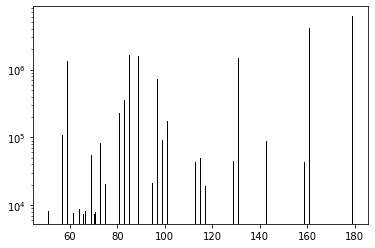

In [3]:
display(get_spectrum("Fallopia", "R04_01_0132"))

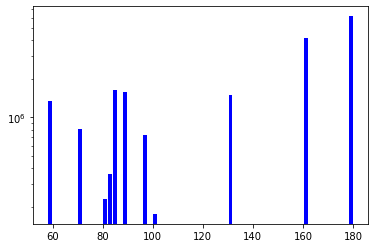

In [4]:
nice_display(get_spectrum("Fallopia", "R04_01_0132"), "blue")

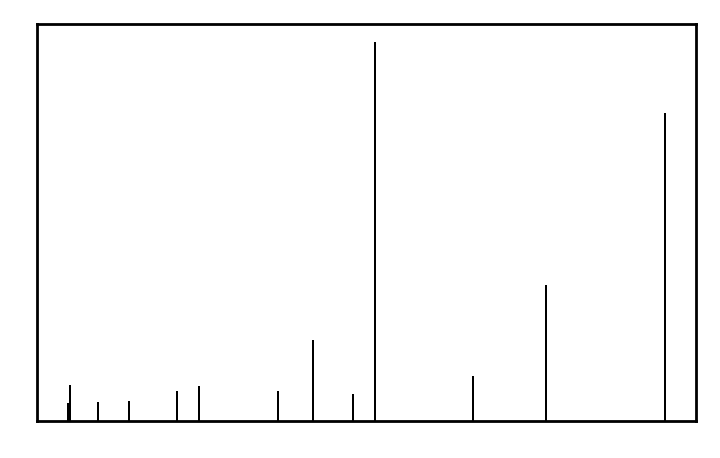

In [5]:
plt.rcParams["figure.figsize"] = (34 / 10, 21 / 10)
plt.rcParams["figure.dpi"] = 250

s = spectra["spectrum_id"][871]

display(get_spectrum("Fallopia", s))

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

#plt.savefig(r"C:/Users/maloh/Desktop/stage/presentation/basique.jpeg")
plt.show()

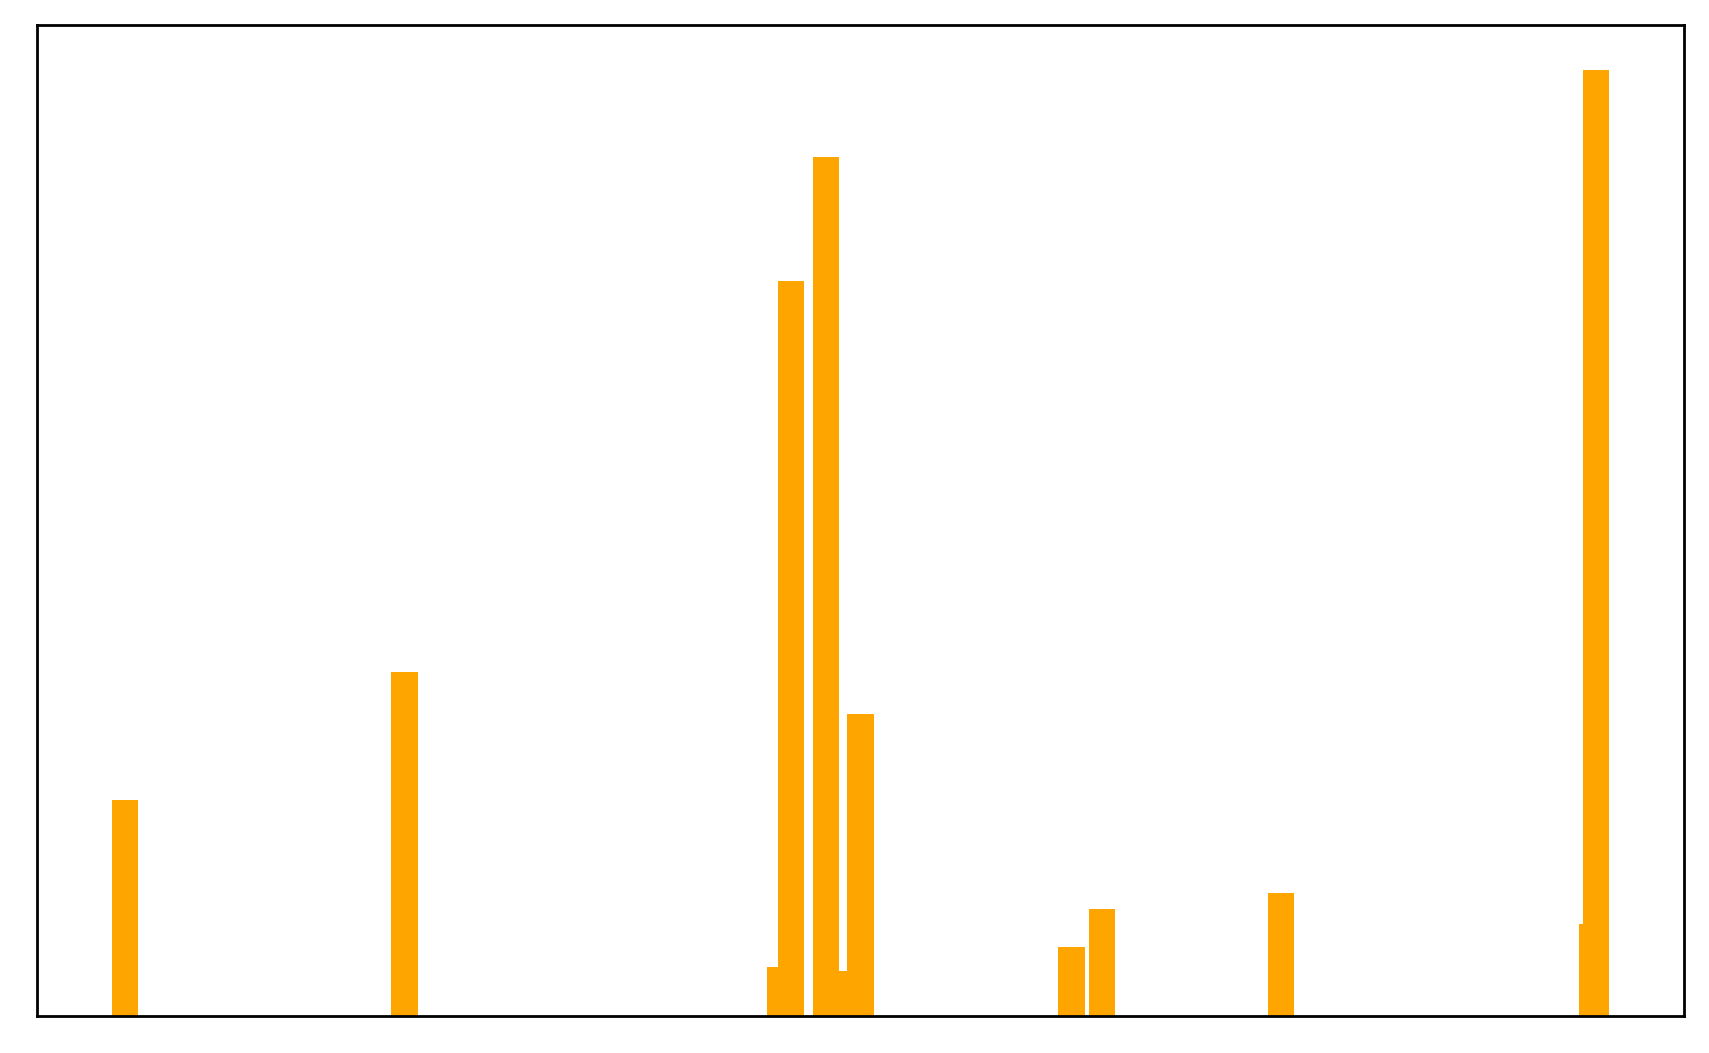

In [6]:
plt.rcParams["figure.figsize"] = (34 / 4, 21 / 4)
plt.rcParams["figure.dpi"] = 250

s = spectra["spectrum_id"][876]

nice_display(get_spectrum("Fallopia", s), "orange")

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

plt.show()

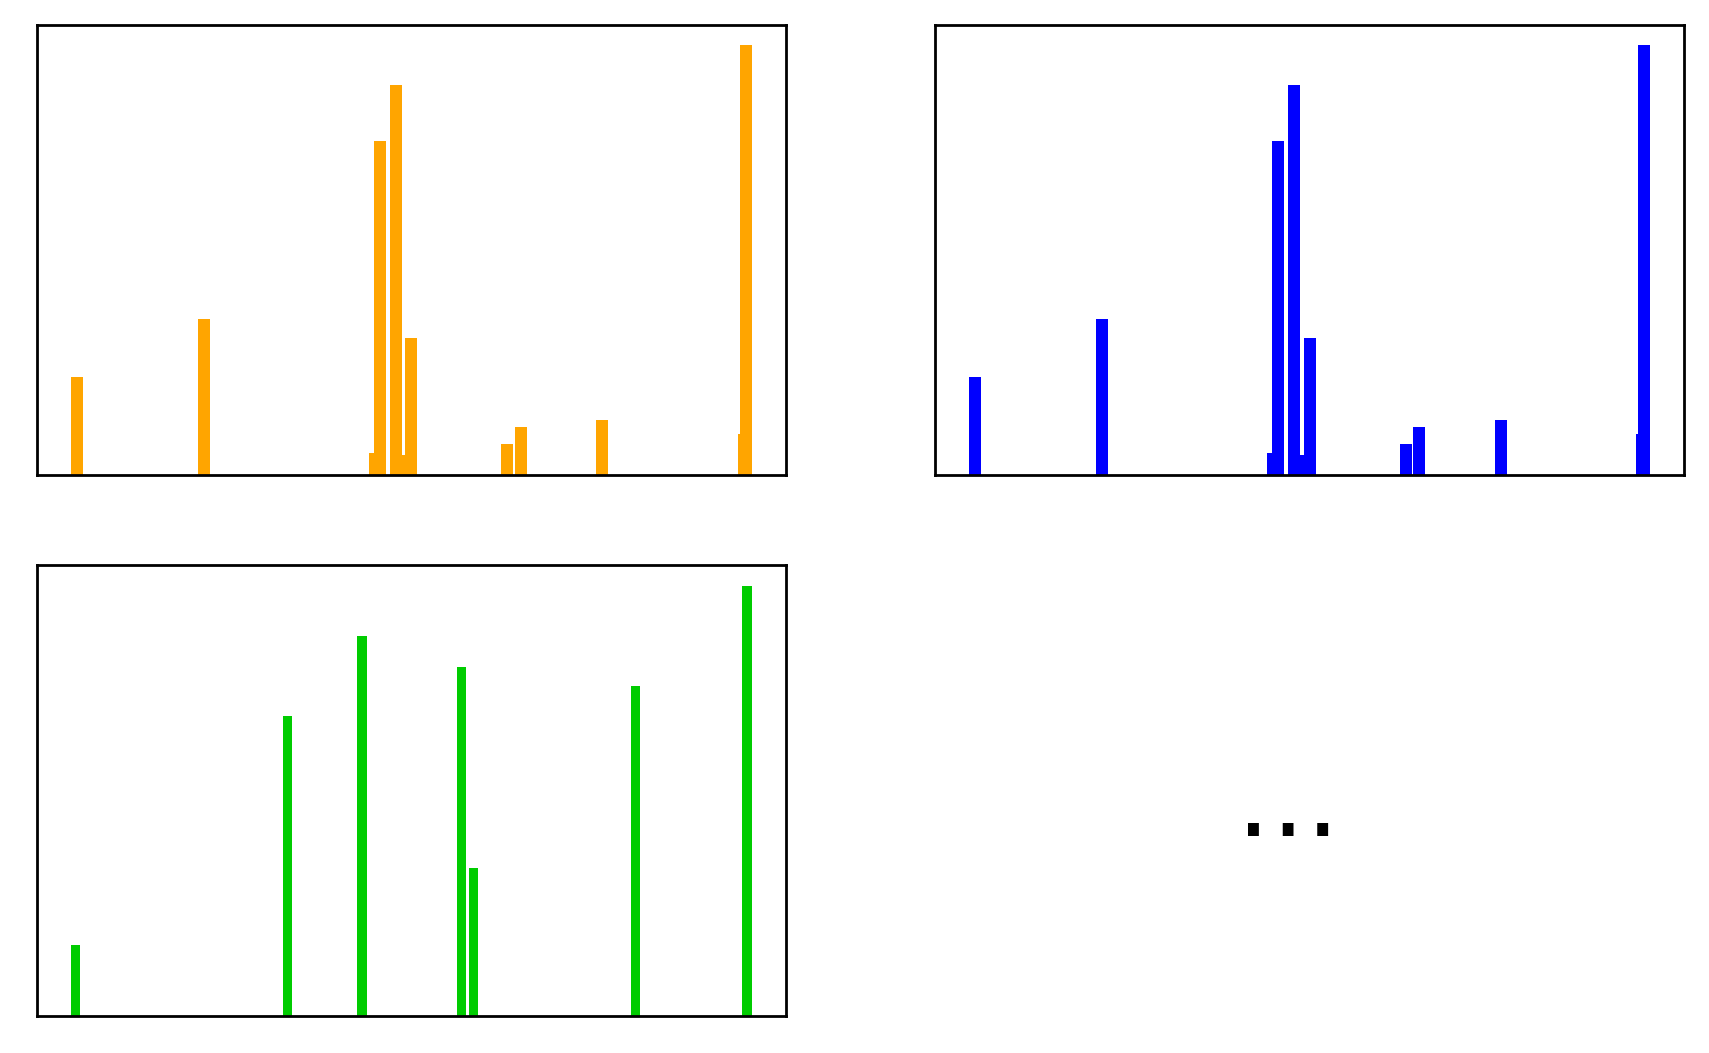

In [7]:
plt.subplot(2, 2, 1)

s = spectra["spectrum_id"][876]

nice_display(get_spectrum("Fallopia", s), "orange")

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())


plt.subplot(2, 2, 2)

s = spectra["spectrum_id"][876]

nice_display(get_spectrum("Fallopia", s), "blue")

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

plt.subplot(2, 2, 3)

s = spectra["spectrum_id"][870]

nice_display(get_spectrum("Fallopia", s), (0, 0.8, 0))

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

plt.subplot(2, 2, 4)
ax = plt.gca()
ax.set_axis_off()
ax.text(0.4, 0.4, r"$\ldots$", size = 30)
plt.show()



In [50]:
s1 = spectra["spectrum_id"][2044]
s2 = spectra["spectrum_id"][8706]

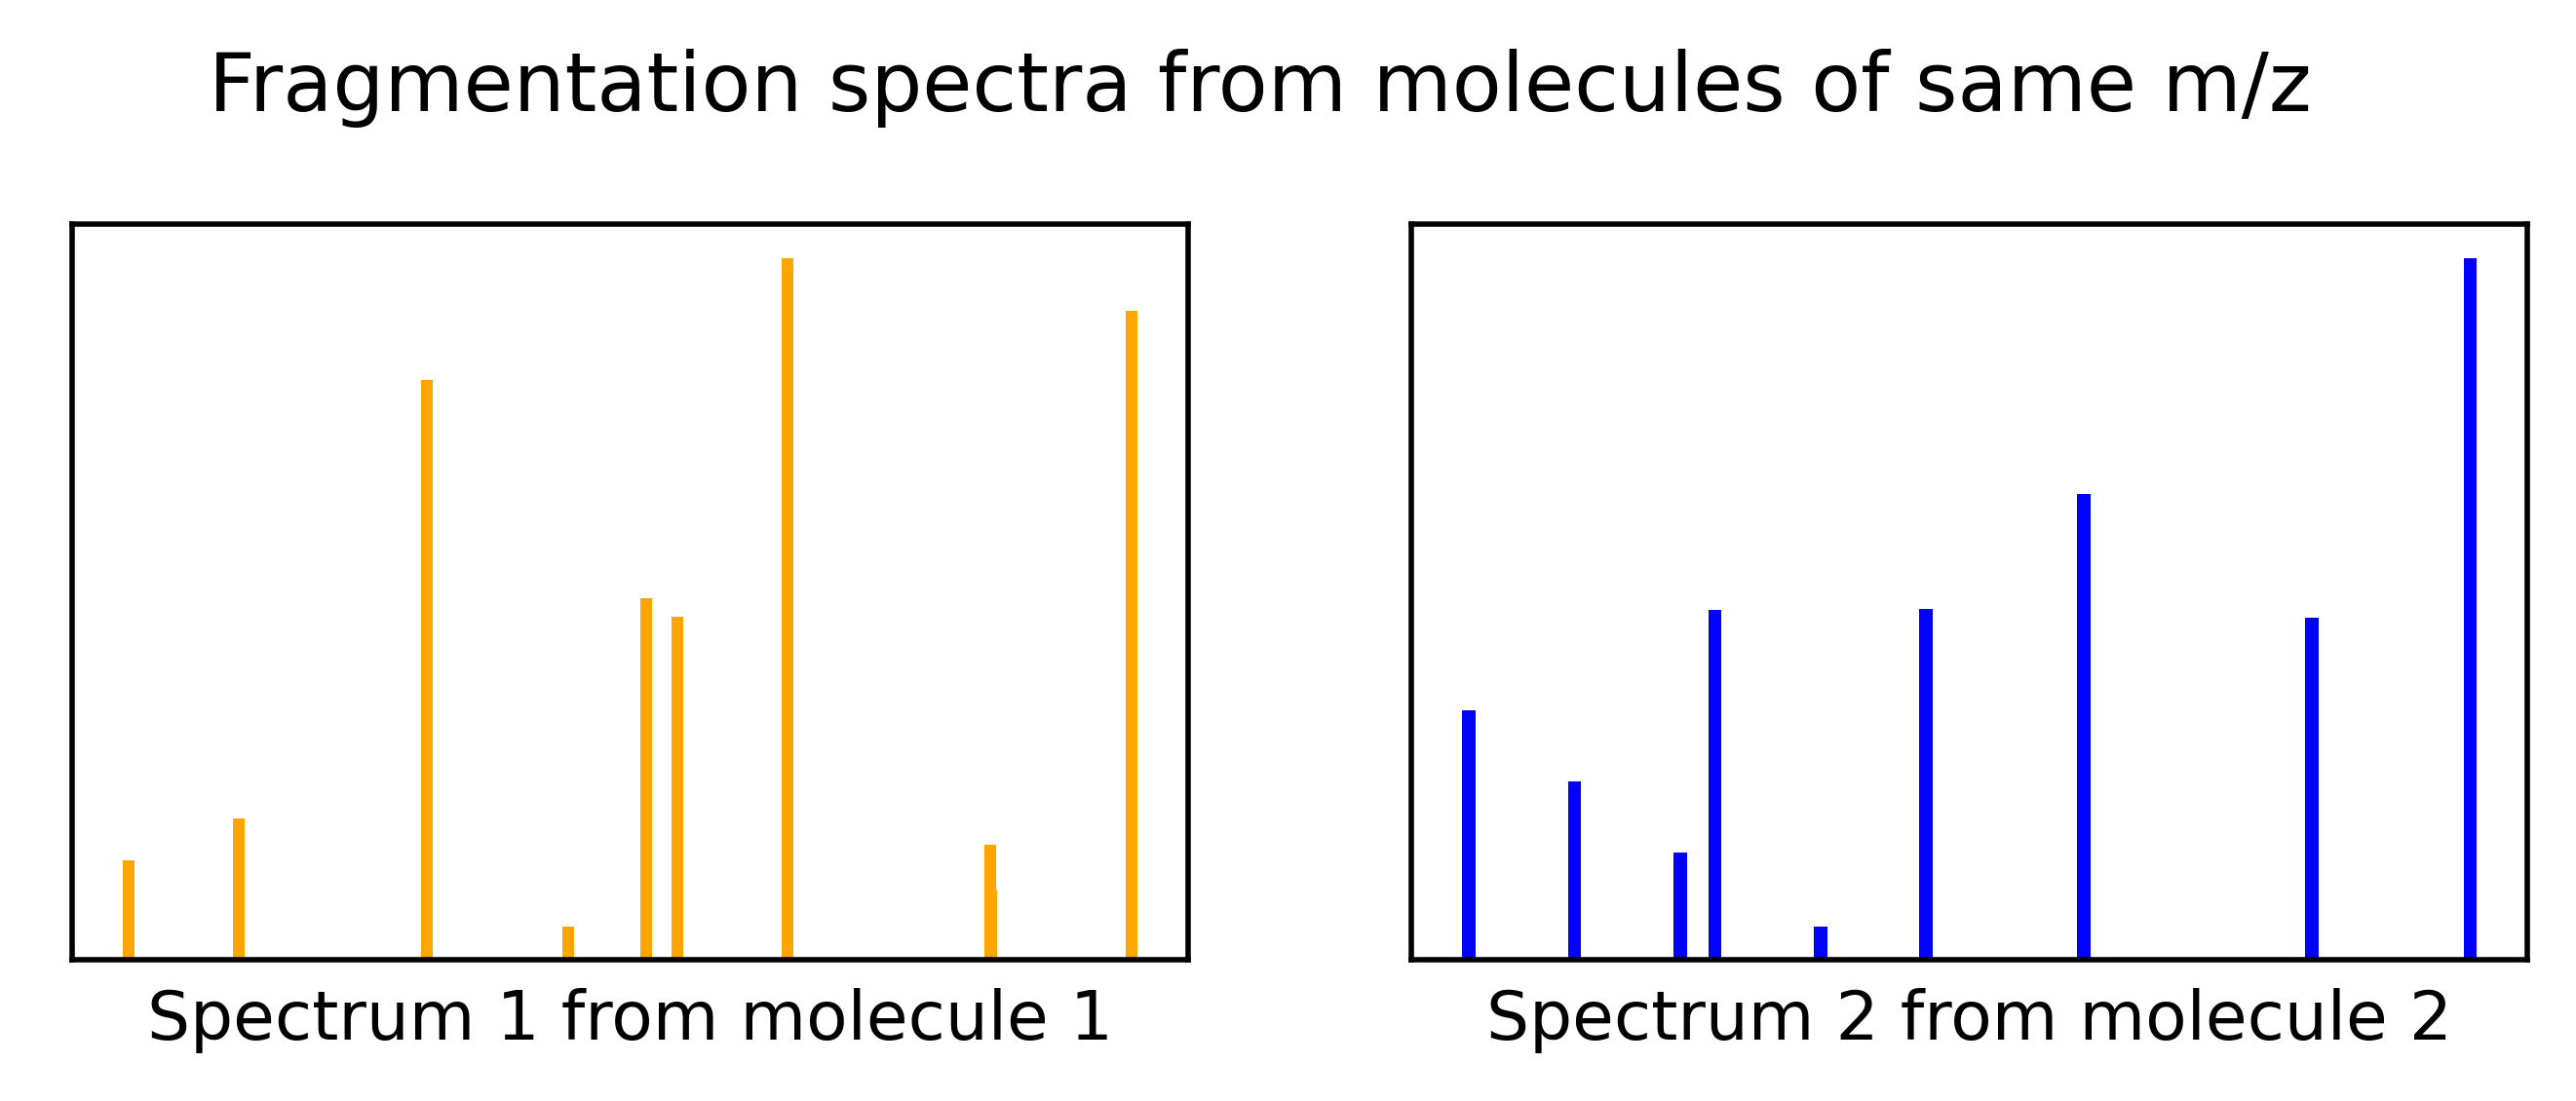

In [53]:
plt.figure(figsize = (26 / 4, 8 / 4))

plt.subplot(1, 2, 1)

nice_display(get_spectrum("Fallopia", s1), "orange")

plt.xlabel(r"Spectrum 1 from molecule 1")

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())


plt.subplot(1, 2, 2)

nice_display(get_spectrum("Fallopia", s2), "blue")

plt.xlabel(r"Spectrum 2 from molecule 2")

plt.xticks = []
plt.yticks = []

ax = plt.gca()
ax.xaxis.set_minor_locator(tk.NullLocator())
ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

fig = plt.gcf()
fig.suptitle("Fragmentation spectra from molecules of same m/z", va = "bottom")




In [9]:
s = spectra["spectrum_id"][871]

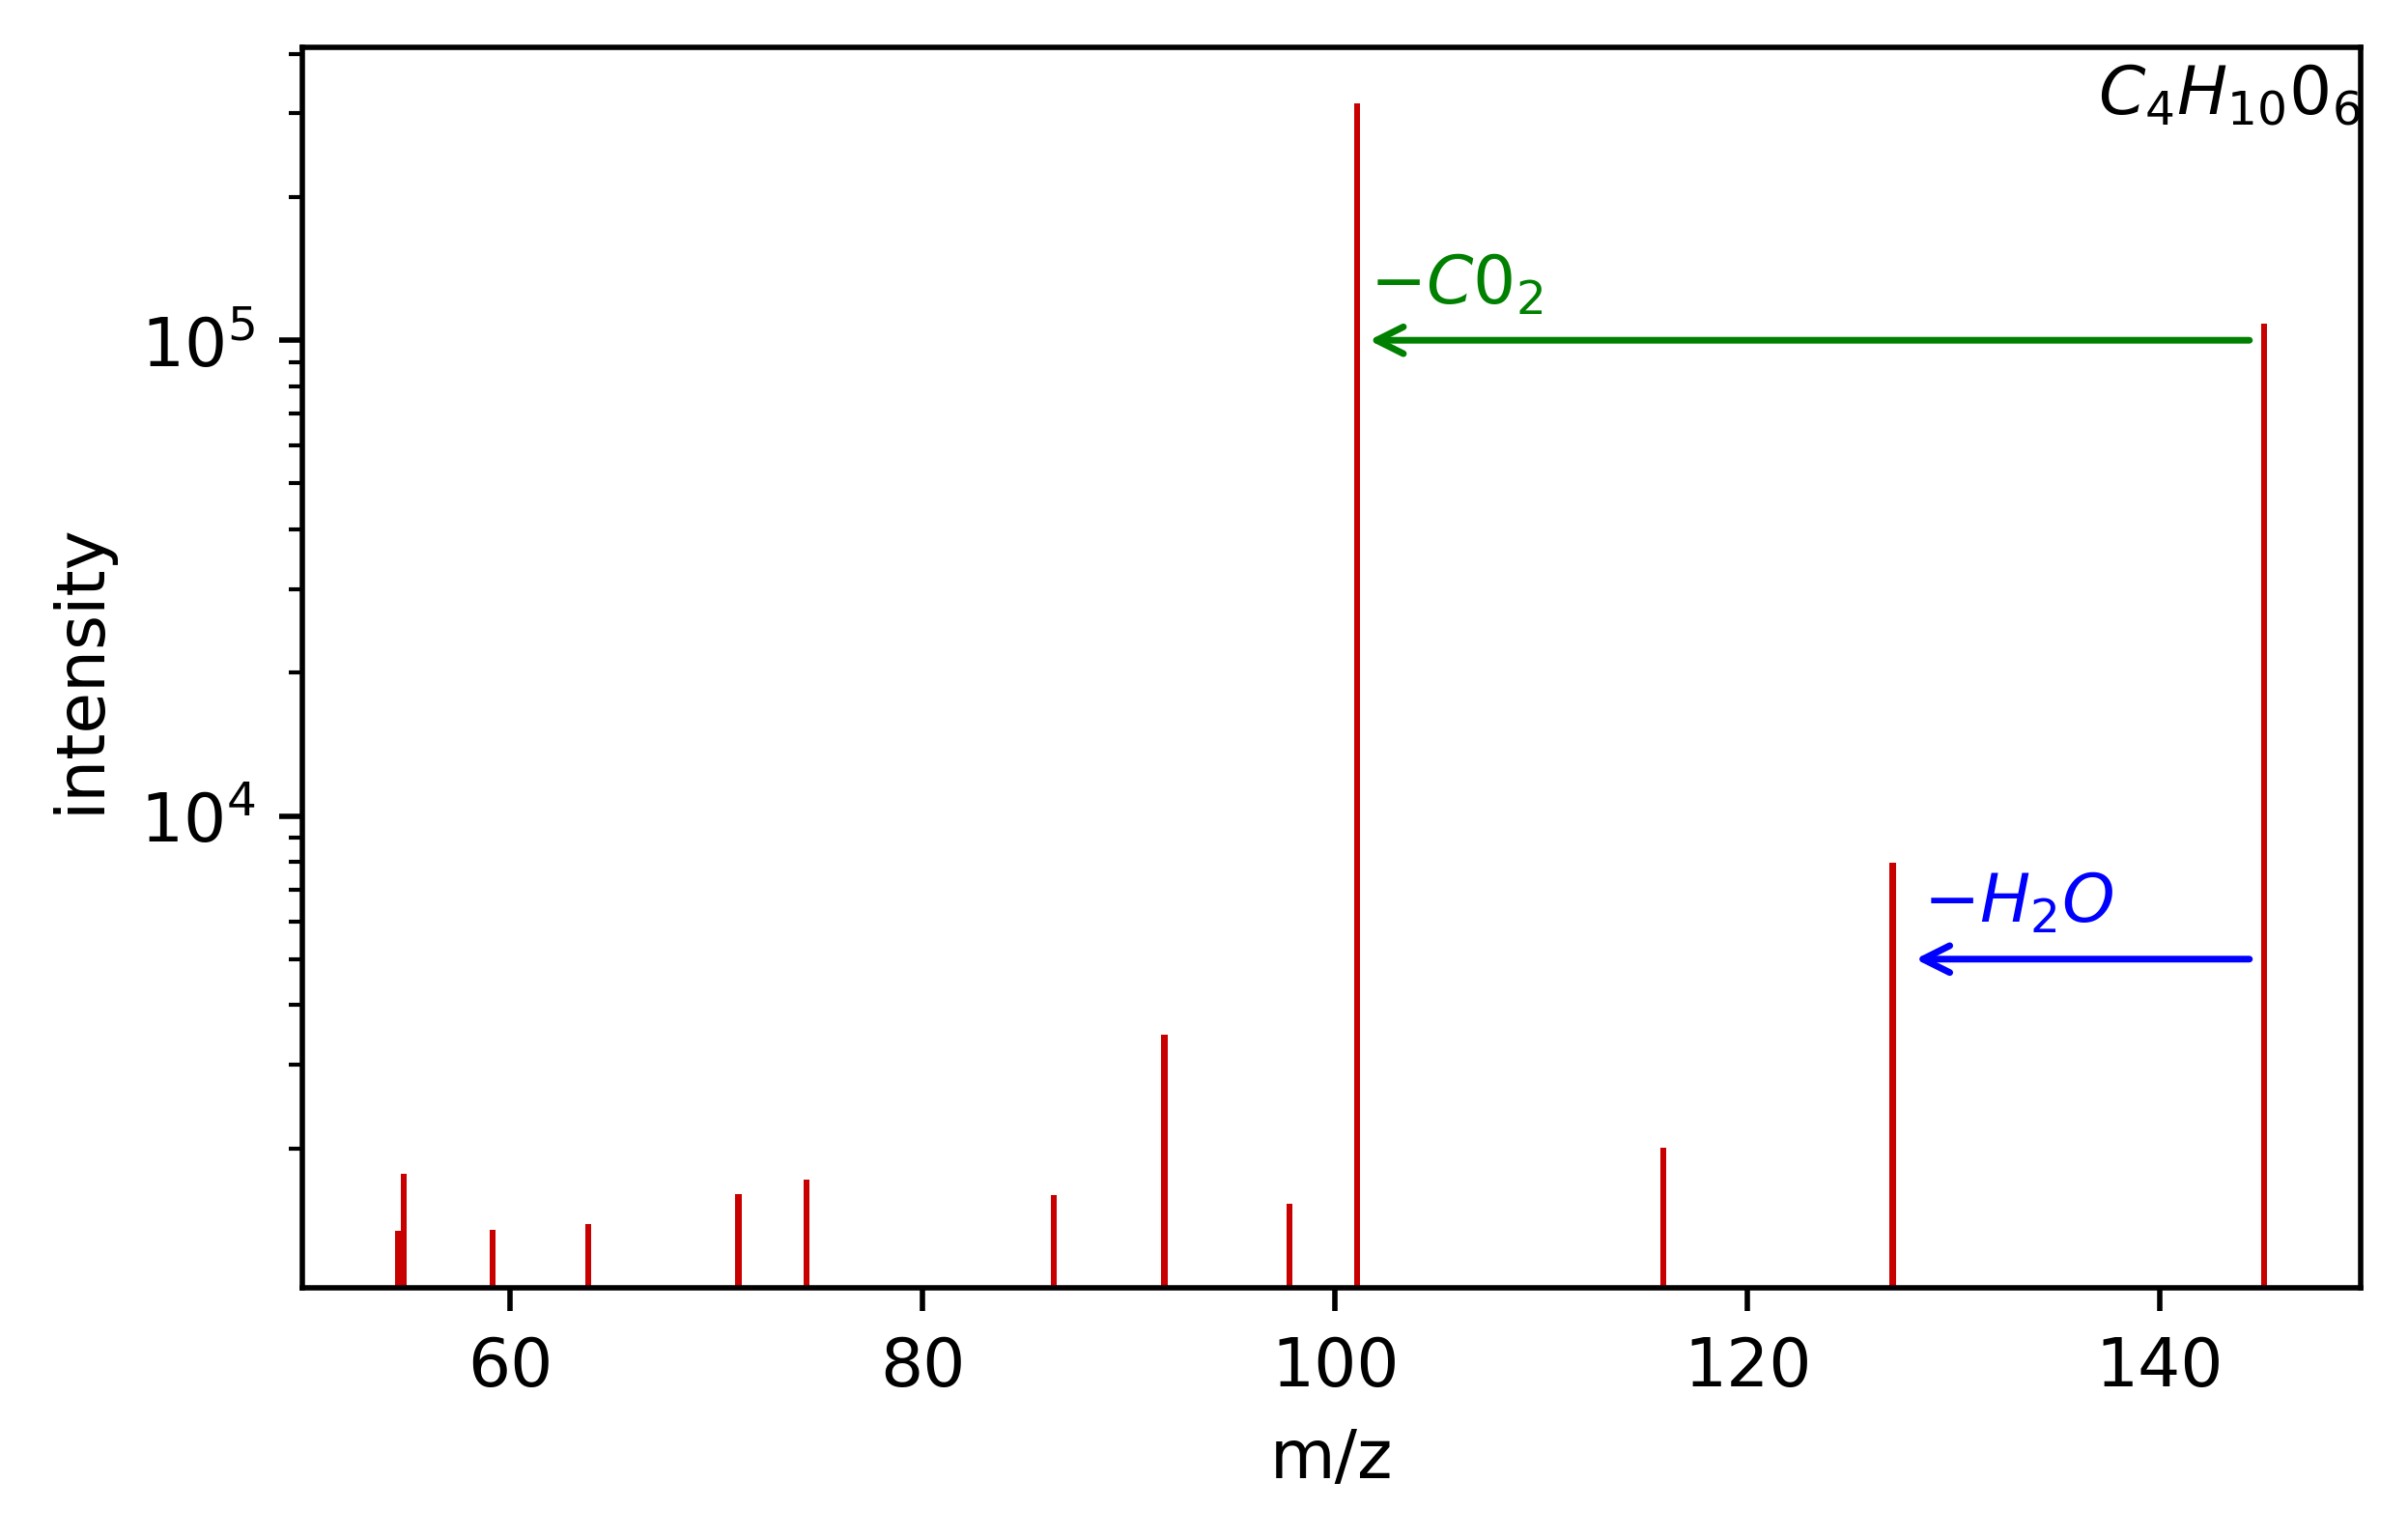

In [10]:
plt.rcParams["figure.figsize"] = (5.5, 3.4)
plt.rcParams["figure.dpi"] = 500

spectrum = get_spectrum("Fallopia", s)

x = spectrum.index

plt.bar(x, spectrum, color = "#C90000", width = .3, label = "spectrum 1")
plt.yscale("log")
plt.xlabel("m/z")
plt.ylabel("intensity")

plt.annotate("$C_4 H_{10} 0_6$",
             xy = (145.5, 3e5),
             xytext = (137, 3e5)
            )

plt.text(101.7, 1.2e5, "$- C0_2$", color = "green")
plt.annotate("", xy = (101, 1e5),
             xytext = (145, 1e5),
             arrowprops = dict(arrowstyle = "->", color = "green")
            )


plt.text(128.5, 6e3, "$- H_2 O$", color = "blue")
plt.annotate("", xy = (127.5, 5e3),
             xytext = (145, 5e3),
             arrowprops = dict(arrowstyle = "->", color = "blue")
            )


plt.show()

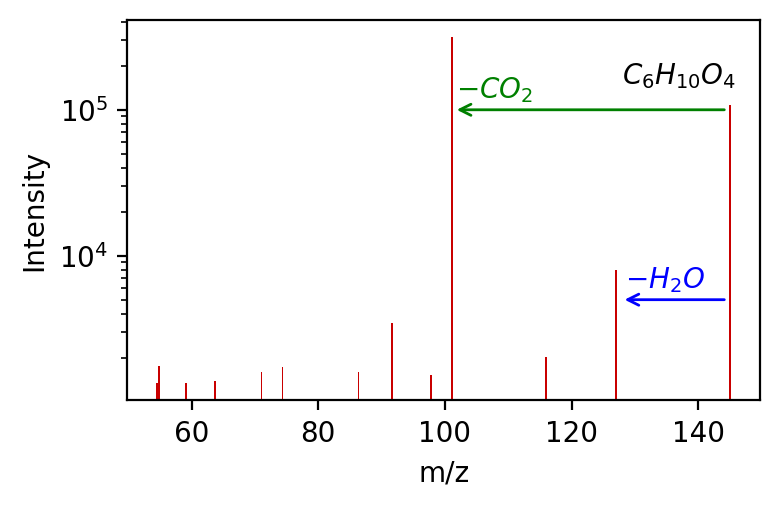

In [11]:
plt.rcParams["figure.figsize"] = (0.12 * 34, 0.12 * 21)
plt.rcParams["figure.dpi"] = 200

spectrum = get_spectrum("Fallopia", s)

x = spectrum.index

plt.bar(x, spectrum, color = "#C90000", width = .3, label = "spectrum 1")
plt.yscale("log")
plt.xlabel("m/z")
plt.ylabel("Intensity")

plt.annotate("$C_6 H_{10} O_4$",
             xy = (145.5, 3e5),
             xytext = (128, 1.5e5)
            )

plt.text(101.7, 1.2e5, "$- CO_2$", color = "green")
plt.annotate("", xy = (101, 1e5),
             xytext = (145, 1e5),
             arrowprops = dict(arrowstyle = "->", color = "green")
            )


plt.text(128.5, 6e3, "$- H_2 O$", color = "blue")
plt.annotate("", xy = (127.5, 5e3),
             xytext = (145, 5e3),
             arrowprops = dict(arrowstyle = "->", color = "blue")
            )
plt.show()

In [15]:
lst = spectra.groupby("compound_id")["spectrum_id"].agg(list)["Fallopia_163"]

In [16]:
s = lst[5]

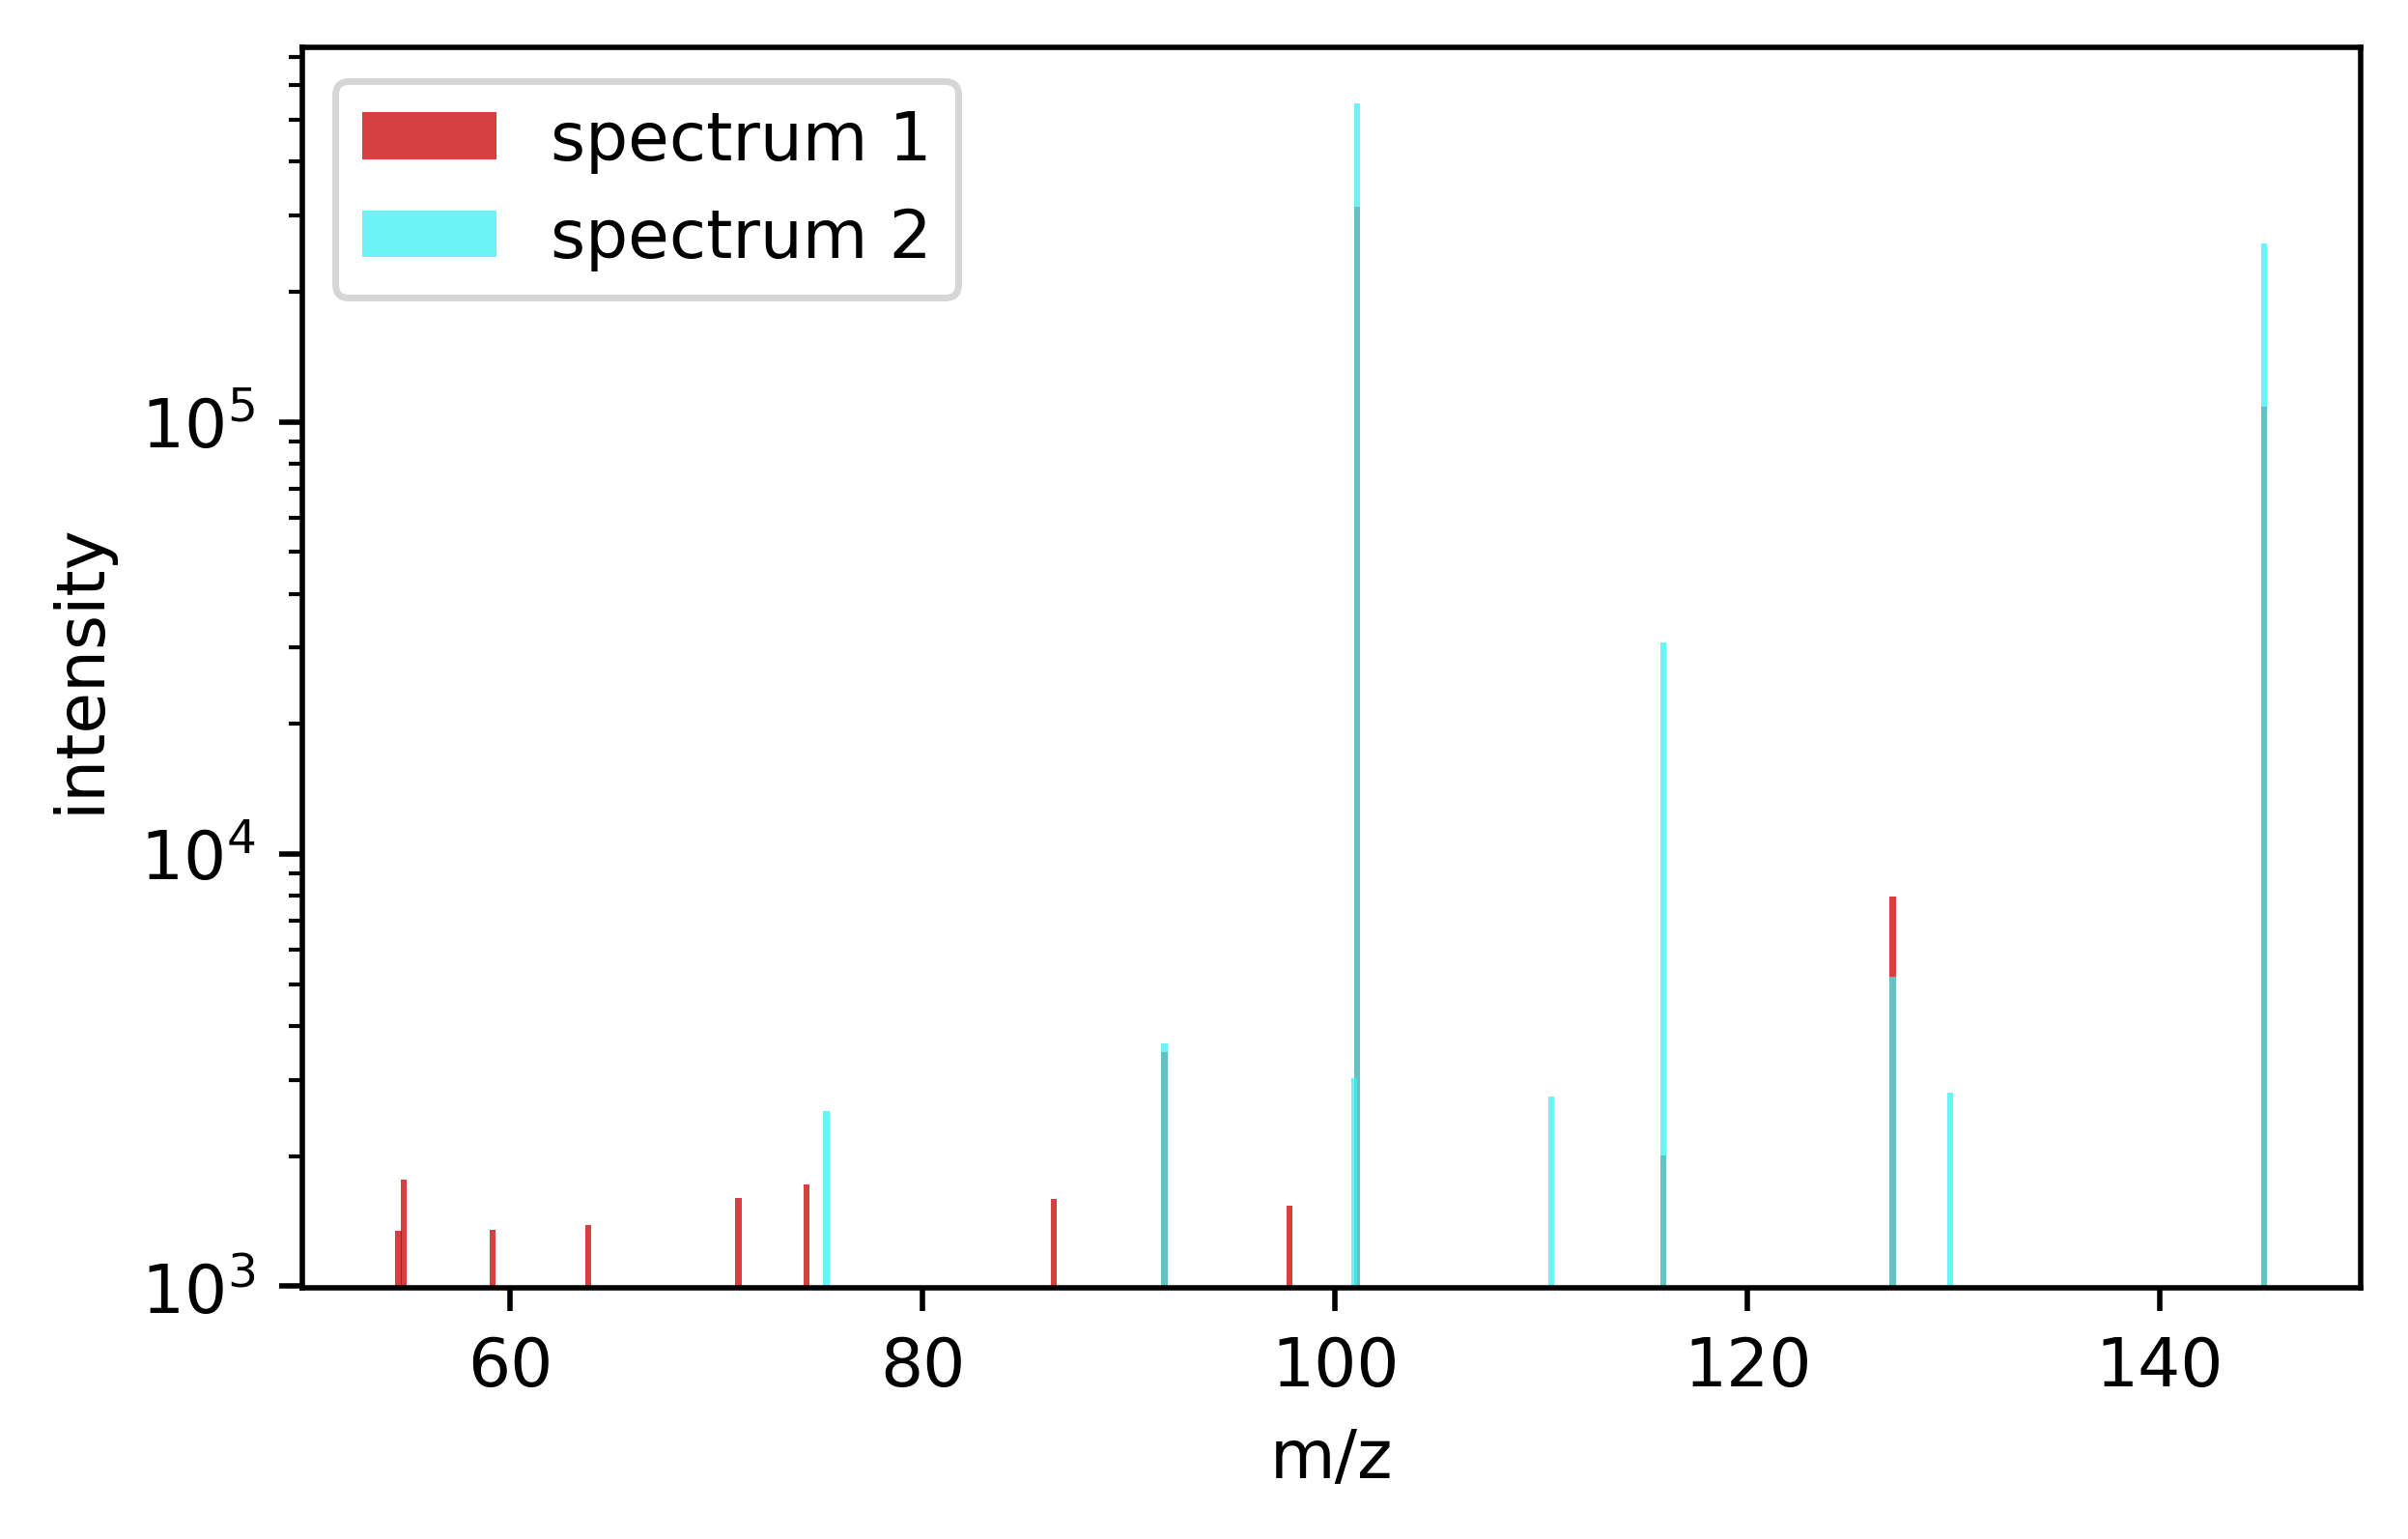

In [17]:
plt.rcParams["figure.figsize"] = (5.5, 3.4)
plt.rcParams["figure.dpi"] = 500

s = lst[1]
spectrum1 = get_spectrum("Fallopia", s)
x1 = spectrum1.index

s = lst[0]
spectrum2 = get_spectrum("Fallopia", s)
x2 = spectrum2.index


plt.bar(x1, spectrum1, color = "#C90000", alpha = .75, width = .3, label = "spectrum 1")
plt.bar(x2, spectrum2, color = "#3BF0F3", alpha = .75, width = .3, label = "spectrum 2")
plt.yscale("log")
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.legend()
plt.show()

In [85]:
s1 = spectra["spectrum_id"][2044]
s2 = spectra["spectrum_id"][8706]

sp1 = get_spectrum("Fallopia", s1)
sp2 = get_spectrum("Fallopia", s2)

In [107]:
sr1_mz = pd.Series(sp1[sp1 > max(sp1) / 50].index)[[False, True, True, False, True, False, True, True, False, True]]
sr2_mz = pd.Series(sp2[sp2 > max(sp2) / 50].index)[[True, False, True, False, False, True, True, True, True]]

In [87]:
from matplotlib.patches import Ellipse as loop

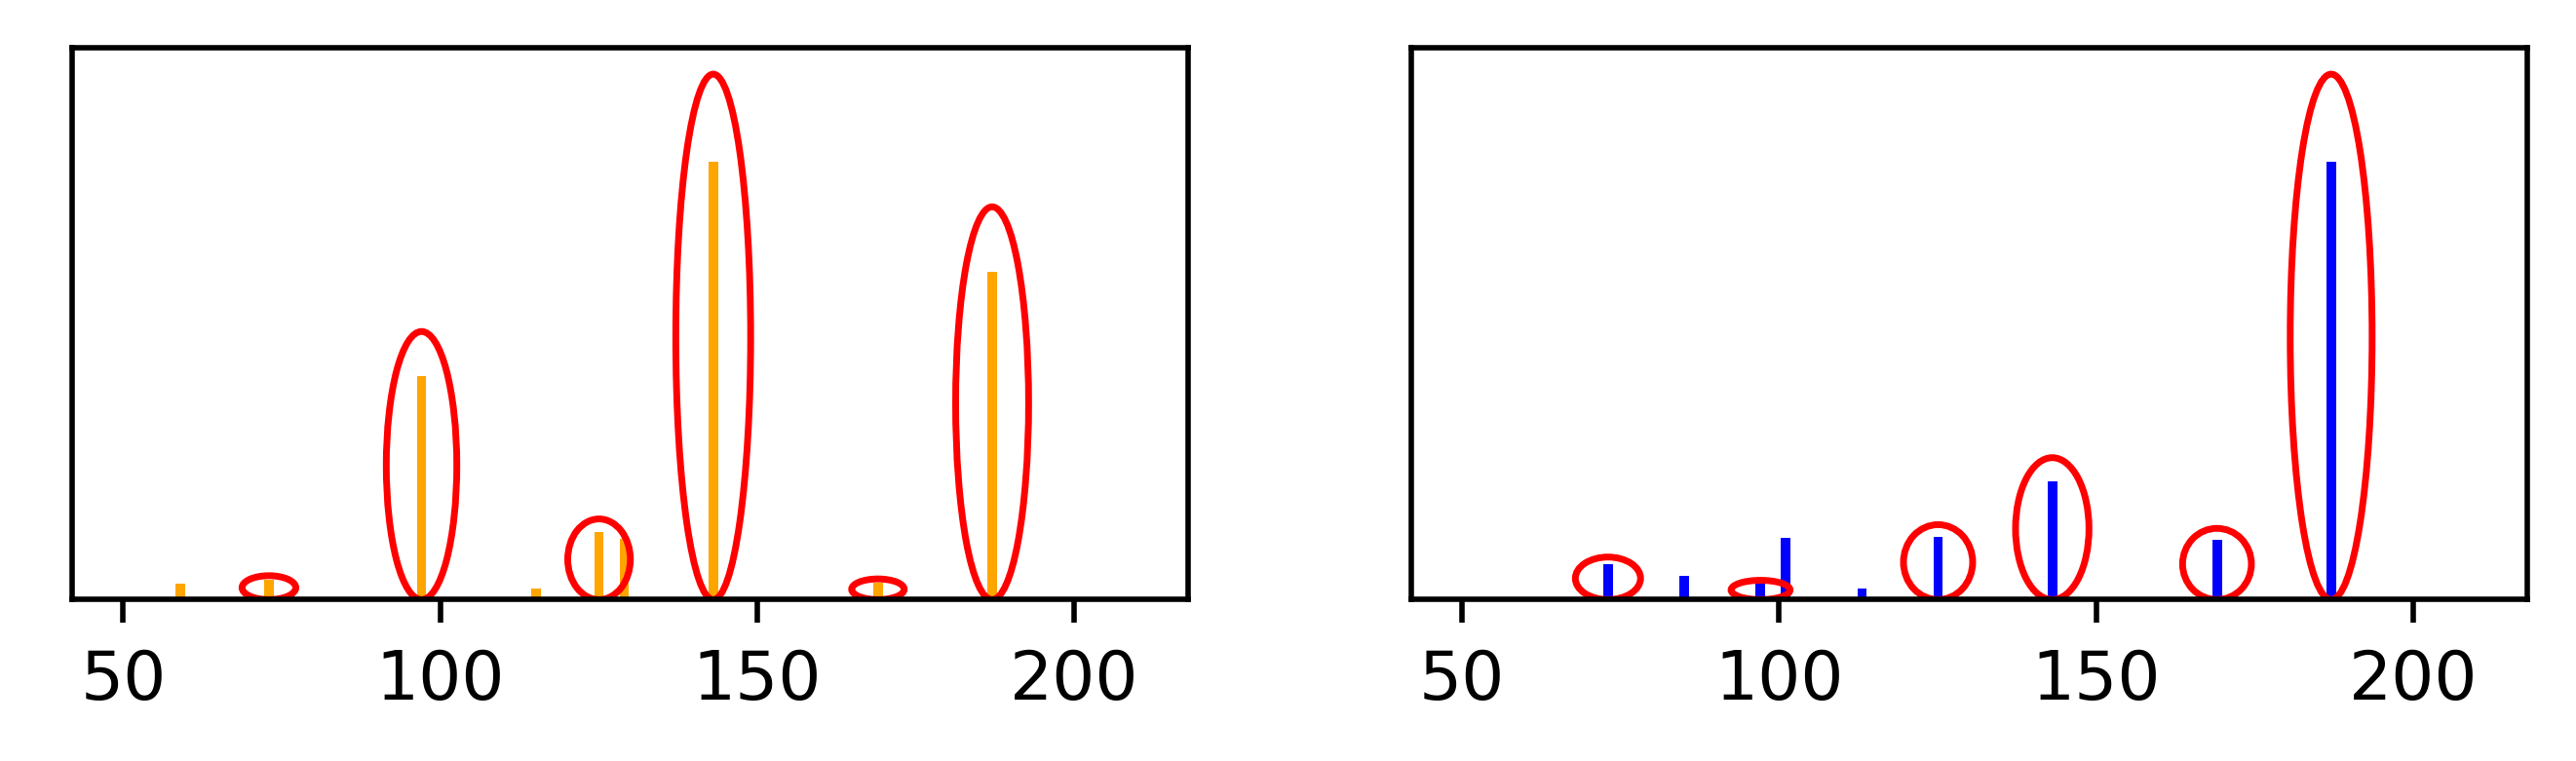

In [115]:
plt.figure(figsize = (26 / 4, 6 / 4))

plt.subplot(1, 2, 1)
d_window(sp1, "orange", max(sp1) / 50)

plt.xticks = []
plt.yticks = []

ax = plt.gca()
#ax.xaxis.set_minor_locator(tk.NullLocator())
#ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

for mz in sr1_mz:
    ax.add_patch(loop((mz, 1.2 * sp1[mz] / 2), np.log(sp1[mz] - max(sp1) / 100), 1.2 * sp1[mz], color = "red", fill = False, lw = 1))


plt.subplot(1, 2, 2)

d_window(sp2, "blue", max(sp2) / 50)

plt.xticks = []
plt.yticks = []

ax = plt.gca()
#ax.xaxis.set_minor_locator(tk.NullLocator())
#ax.xaxis.set_major_locator(tk.NullLocator())
ax.yaxis.set_minor_locator(tk.NullLocator())
ax.yaxis.set_major_locator(tk.NullLocator())

for mz in sr2_mz:
    ax.add_patch(loop((mz, 1.2 * sp2[mz] / 2), np.log(sp2[mz] - max(sp2) / 100), 1.2 * sp2[mz], color = "red", fill = False, lw = 1))


plt.show()
